**einsum can undertake tensor operations like**
- Matrix multiplication
- Elementwise multiplication
- Permutations
- Ordering the inputs to satrisfy match the function.




**Cons of einsum** 
- Computational complexity in sum cases.

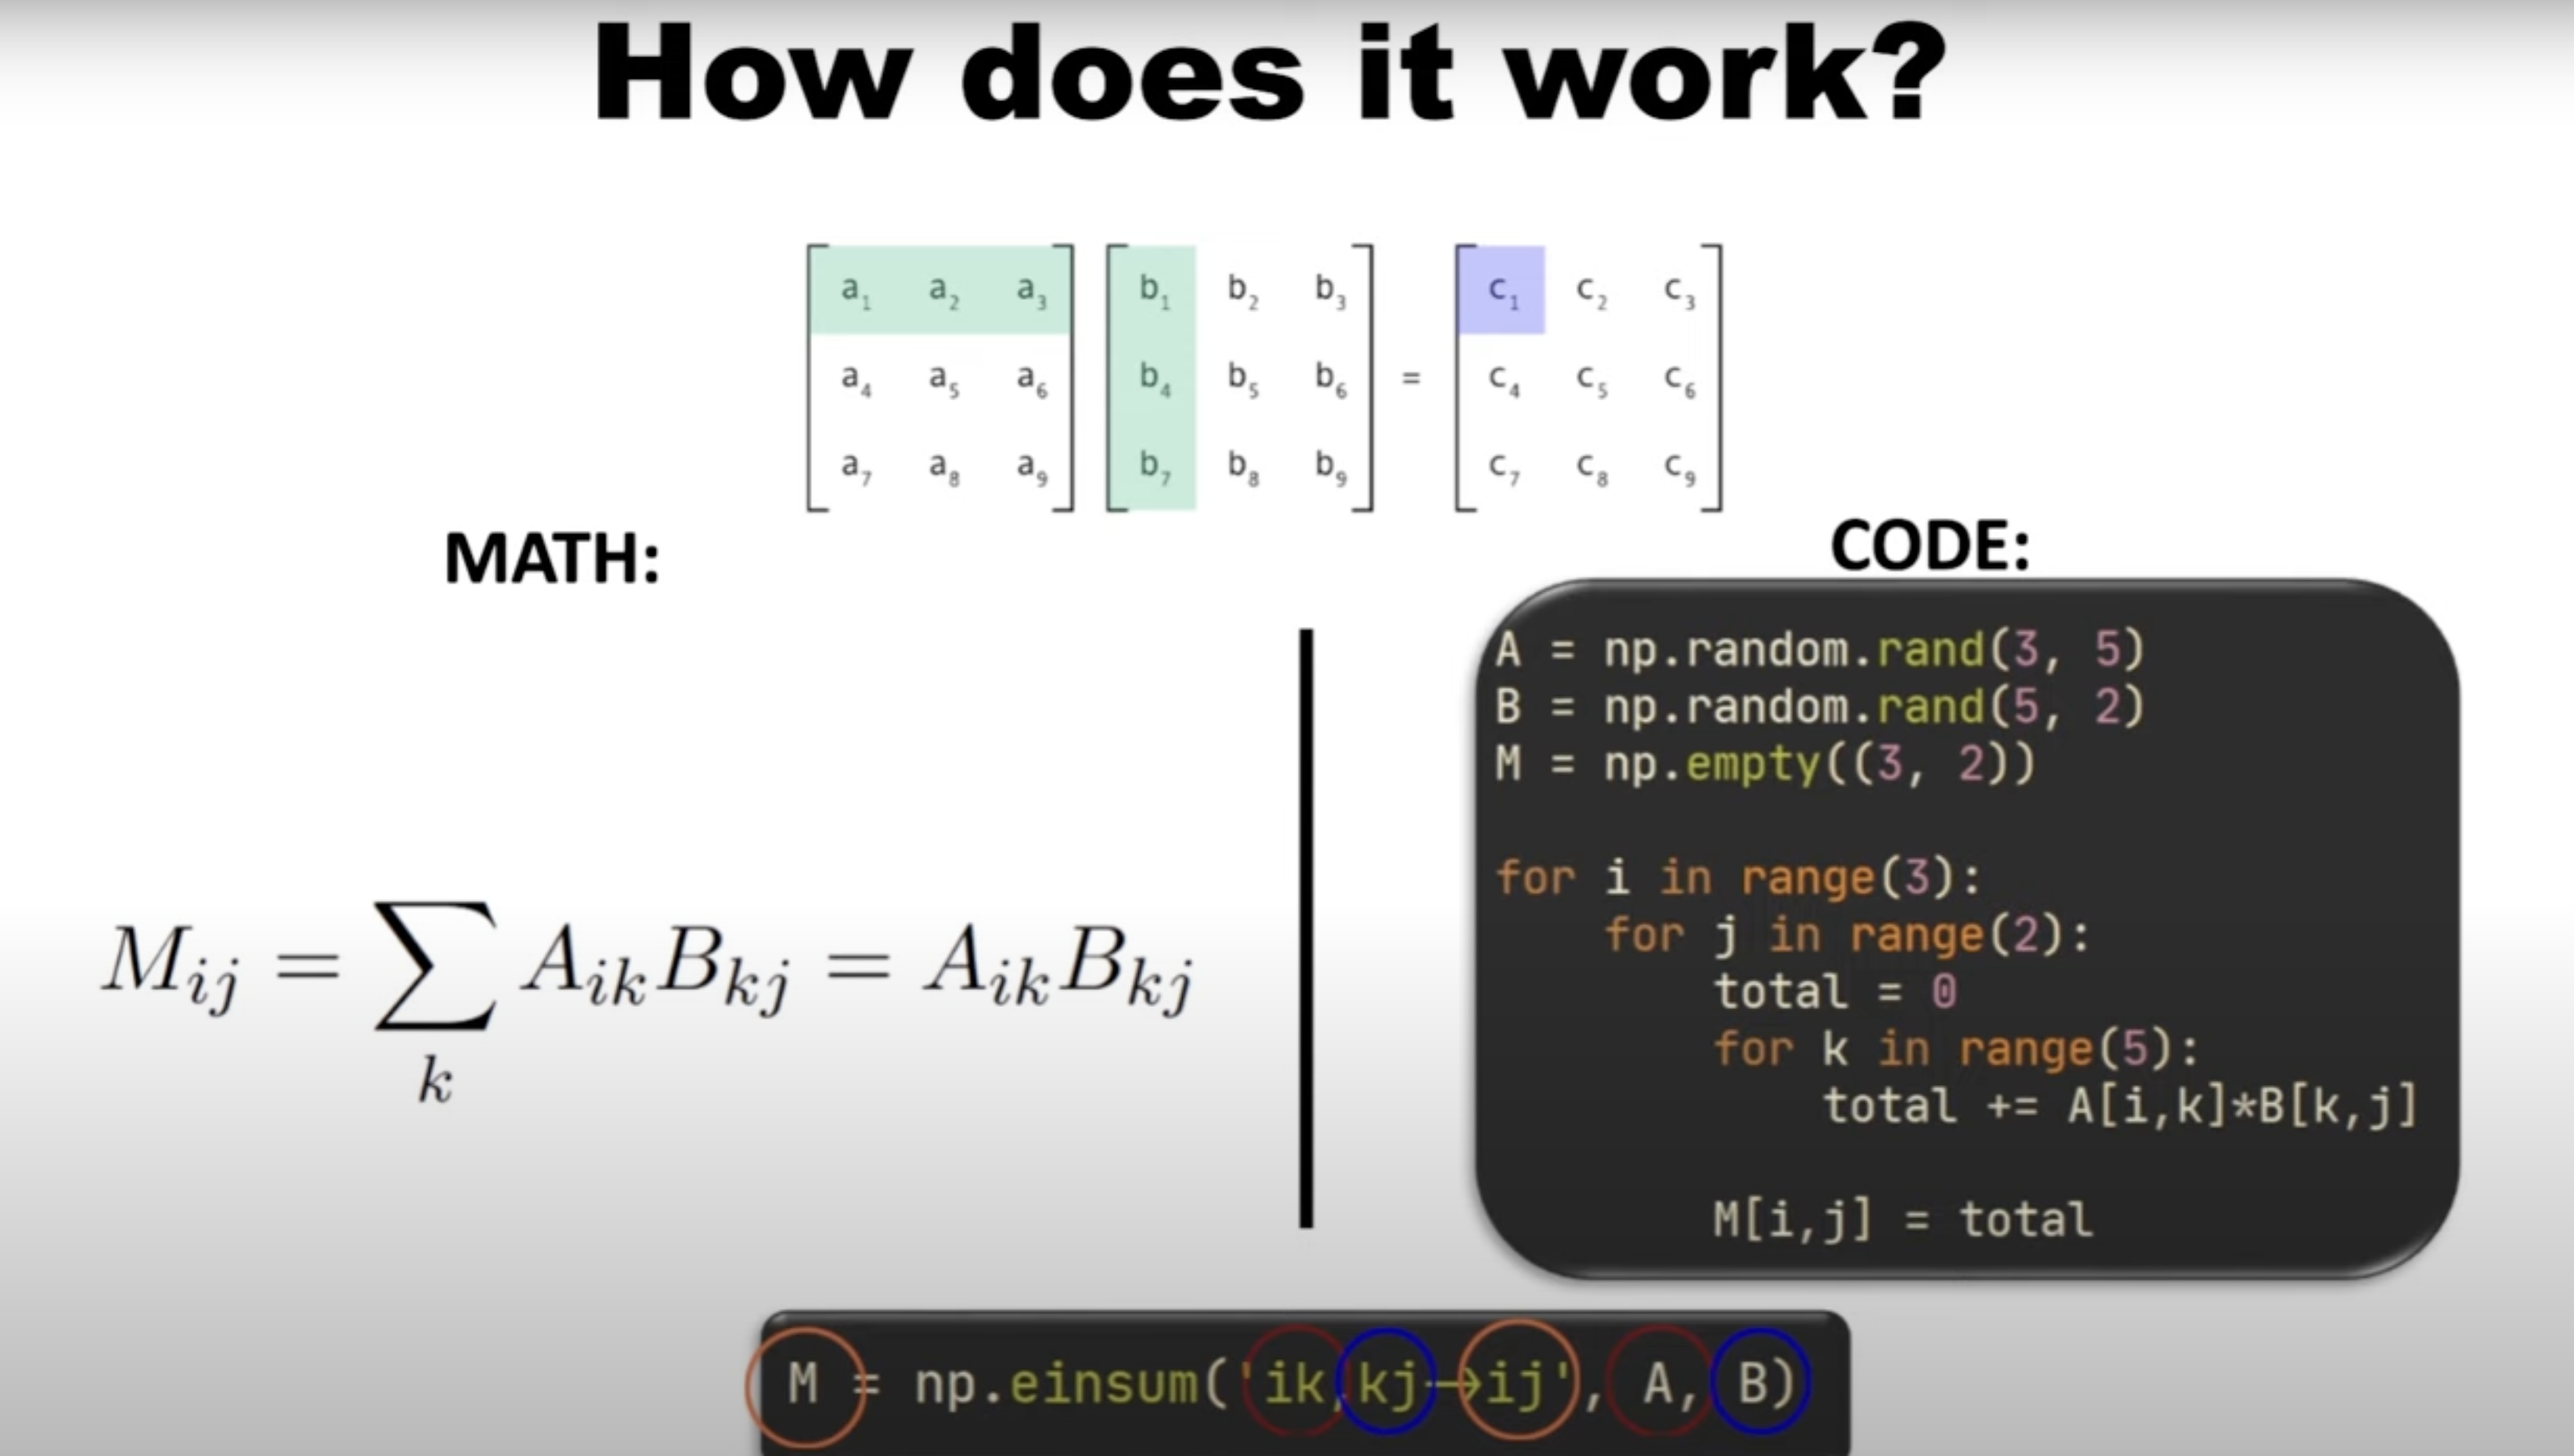

Free indices ---> i, j (Outer Loops)

Summation Indices-----> k (Inner Loops)


In [4]:
import torch

x = torch.rand((2,3))
print(x)

tensor([[0.0794, 0.9838, 0.8542],
        [0.8600, 0.2265, 0.8838]])


In [6]:
#Permutaion
torch.einsum('ij->ji', x)

tensor([[0.0794, 0.8600],
        [0.9838, 0.2265],
        [0.8542, 0.8838]])

In [7]:
#Summation
torch.einsum('ij->', x)

tensor(3.8878)

In [8]:
#Column Summation
torch.einsum('ij->j',x)

tensor([0.9394, 1.2104, 1.7380])

In [10]:
#Raw Summation
torch.einsum('ij->i',x)

tensor([1.9175, 1.9704])

In [12]:
v = torch.rand((1, 3))
torch.einsum('ij, kj->ik', x, v) #No reshaping is needed

tensor([[0.9305],
        [1.0678]])

In [14]:
torch.einsum('ij, kj->ik', x, x) #Since when x.x matrix multiplication the Traspose of the second x should be taken.

tensor([[1.7038, 1.0462],
        [1.0462, 1.5721]])

In [15]:
torch.einsum('i,i ->', x[0], x[0])
#Getting specific row of X and doing vector dot product.

tensor(1.7038)

In [16]:
torch.einsum('ij, ij->', x, x)  
#Doing the dot product of the whole matrix

tensor(3.2759)

In [17]:
torch.einsum('ij, ij->ij', x, x)
#Element wise multiplication

tensor([[0.0063, 0.9679, 0.7296],
        [0.7396, 0.0513, 0.7812]])

In [18]:
#Batch Matrix Multiplication
a = torch.rand((3, 2, 5))
b = torch.rand((3, 5, 3))
torch.einsum('ijk, ikl->ijl', a, b)

tensor([[[0.4129, 0.9854, 1.2904],
         [0.5409, 0.9688, 1.8324]],

        [[0.6919, 1.0857, 1.1224],
         [0.9635, 1.0807, 1.8179]],

        [[0.7822, 0.9017, 0.7162],
         [0.5876, 0.5248, 0.9156]]])

In [19]:
x = torch.rand((3,3))
torch.einsum('ii->i', x)
#Trace of the matrix

tensor([0.6705, 0.6120, 0.2267])